In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds
tf.random.set_seed(42)
np.random.seed(42)

#all items (except for sandal, shirts) classification
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A.h5")

#sandal, shirts binary classification
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/20
1375/1375 [==============================] - 9s 6ms/step - loss: 0.5689 - accuracy: 0.8163 - val_loss: 0.3926 - val_accuracy: 0.8625
Epoch 2/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.3577 - accuracy: 0.8773 - val_loss: 0.3287 - val_accuracy: 0.8894
Epoch 3/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.3192 - accuracy: 0.8890 - val_loss: 0.3006 - val_accuracy: 0.9016
Epoch 4/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.2998 - accuracy: 0.8959 - val_loss: 0.2878 - val_accuracy: 0.9046
Epoch 5/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2867 - accuracy: 0.9009 - val_loss: 0.2773 - val_accuracy: 0.9091
Epoch 6/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.2768 - accuracy: 0.9038 - val_loss: 0.2717 - val_accuracy: 0.9106
Ep

Epoch 1/4
7/7 [==============================] - 1s 63ms/step - loss: 1.5819 - accuracy: 0.2000 - val_loss: 0.8068 - val_accuracy: 0.5456
Epoch 2/4
7/7 [==============================] - 0s 32ms/step - loss: 0.5973 - accuracy: 0.6850 - val_loss: 0.3907 - val_accuracy: 0.8408
Epoch 3/4
7/7 [==============================] - 0s 19ms/step - loss: 0.3024 - accuracy: 0.8950 - val_loss: 0.2528 - val_accuracy: 0.9300
Epoch 4/4
7/7 [==============================] - 0s 18ms/step - loss: 0.1986 - accuracy: 0.9650 - val_loss: 0.1880 - val_accuracy: 0.9574
Epoch 1/16
7/7 [==============================] - 1s 64ms/step - loss: 0.1602 - accuracy: 0.9800 - val_loss: 0.1853 - val_accuracy: 0.9584
Epoch 2/16
7/7 [==============================] - 0s 20ms/step - loss: 0.1573 - accuracy: 0.9800 - val_loss: 0.1826 - val_accuracy: 0.9584
Epoch 3/16
7/7 [==============================] - 0s 19ms/step - loss: 0.1547 - accuracy: 0.9800 - val_loss: 0.1801 - val_accuracy: 0.9594
Epoch 4/16
7/7 [===============

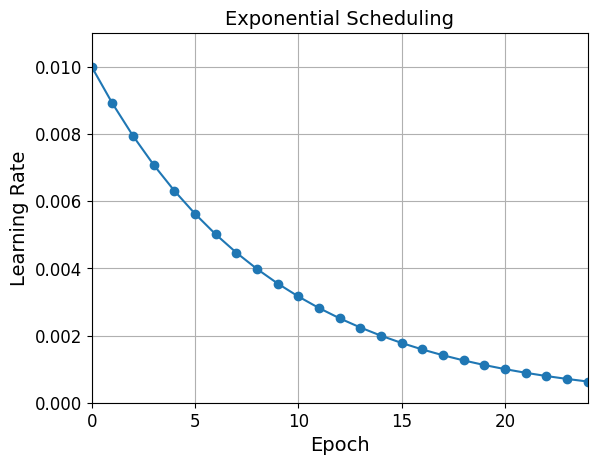

In [7]:
import tensorflow as tf
from tensorflow import keras

model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])       #model_A도 영향을 받음
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())    #모델을 clone 후 가중치를 별도 복사

for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",
                     metrics=["accuracy"])      #층 동결 혹은 동결해제 후 꼭 complie

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True    #층 동결해제

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-4),    #동결 해제 후 학습률을 낮춰주면 재사용된 가중치가 망가지는 것을 방지
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#지수 기반 스케줄링 구현
def exponential_decay_fn(epoch):
  return 0.01 * 0.1**(epoch / 20)

#위 함수처럼 lr0(초기학습률) 과 s(스탭 수)를 하드코딩 하지 않고 입력 받고 싶을 경우
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1 **(epoch / s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()
